In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as ss

%matplotlib inline

In [133]:
tsa = pd.read_csv('tsa_claims_ujian.csv')

In [134]:
tsa.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
1,14268,20-Jun-02,6/16/2002 0:00,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN
2,15242,12-Jul-02,5/31/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny
3,16759,21-Aug-02,7/12/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,$21.44,Approved,$21.00,Approve in Full
4,17846,9-Sep-02,8/30/2002 0:00,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$1;832.22,Canceled,$0.00,NaN


In [135]:
tsa.tail()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
51061,2015110926685,22-Oct-15,19-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses,-,-,NaN,NaN
51062,2015110226479,2-Nov-15,2-Nov-15,-,-,-,Passenger Property Loss,Checkpoint,Books; Magazines & Other,-,-,NaN,NaN
51063,2015120727336,16-Nov-15,14-Sep-15,-,-,American Airlines,Passenger Property Loss,Checked Baggage,Cosmetics & Grooming,-,-,NaN,NaN
51064,2015120427297,20-Nov-15,16-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,-,-,NaN,NaN
51065,2016010428072,22-Dec-15,20-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,-,-,NaN,NaN


In [136]:
tsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 13 columns):
Claim Number     51066 non-null object
Date Received    50996 non-null object
Incident Date    50496 non-null object
Airport Code     49014 non-null object
Airport Name     49014 non-null object
Airline Name     42511 non-null object
Claim Type       49106 non-null object
Claim Site       50876 non-null object
Item             50054 non-null object
Claim Amount     50074 non-null object
Status           51065 non-null object
Close Amount     33786 non-null object
Disposition      32846 non-null object
dtypes: object(13)
memory usage: 5.1+ MB


In [137]:
tsa.describe()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
count,51066,50996,50496,49014,49014,42511,49106,50876,50054,50074,51065,33786,32846
unique,51065,3522,10788,405,419,243,8,6,1854,13248,13,6009,3
top,2013121110011,27-May-04,12/22/2004 0:00,LAX,John F. Kennedy International,American Airlines,Passenger Property Loss,Checked Baggage,Other,$0.00,Denied,$0.00,Deny
freq,2,182,43,2379,2286,4377,29713,39937,9183,7065,17134,17907,17147


In [138]:
tsaDesc = []
for i in tsa.columns:
    tsaDesc.append([i, 
                      tsa[i].dtypes, 
                      tsa[i].isna().sum(), 
                      round((((tsa[i].isna().sum())/(len(tsa)))*100),2), 
                      tsa[i].nunique(),
                      tsa[i].drop_duplicates().sample(2).values])
    
    
pd.DataFrame(tsaDesc, columns = ['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'])

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Claim Number,object,0,0.00,51065,"[2014041813365, 2011051983534]"
1,Date Received,object,70,0.14,3522,"[22-Nov-10, 26-Apr-06]"
2,Incident Date,object,570,1.12,10788,"[10/24/2009 12:15, 12/31/2003 0:00]"
3,Airport Code,object,2052,4.02,405,"[TXK, ATW]"
4,Airport Name,object,2052,4.02,419,"[Okaloosa/ Northwest Florida, Dodge City Regio..."
5,Airline Name,object,8555,16.75,243,"[Pakistan International Airlines Cor , SunWin..."
6,Claim Type,object,1960,3.84,8,"[Property Damage, Complaint]"
7,Claim Site,object,190,0.37,6,"[Checked Baggage, Other]"
8,Item,object,1012,1.98,1854,[Clothing - Shoes; belts; accessories; etc.; H...
9,Claim Amount,object,992,1.94,13248,"[$161.57 , $6;160.00 ]"


If you notice, there is '-' value that become a filler for an empty value. Replace all these '-' in every column into NaN object (np.nan) 

In [139]:
tsa.replace({'-': np.nan}, inplace=True)

In [140]:
pd.DataFrame(tsaDesc, columns = ['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'])

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Claim Number,object,0,0.00,51065,"[2014041813365, 2011051983534]"
1,Date Received,object,70,0.14,3522,"[22-Nov-10, 26-Apr-06]"
2,Incident Date,object,570,1.12,10788,"[10/24/2009 12:15, 12/31/2003 0:00]"
3,Airport Code,object,2052,4.02,405,"[TXK, ATW]"
4,Airport Name,object,2052,4.02,419,"[Okaloosa/ Northwest Florida, Dodge City Regio..."
5,Airline Name,object,8555,16.75,243,"[Pakistan International Airlines Cor , SunWin..."
6,Claim Type,object,1960,3.84,8,"[Property Damage, Complaint]"
7,Claim Site,object,190,0.37,6,"[Checked Baggage, Other]"
8,Item,object,1012,1.98,1854,[Clothing - Shoes; belts; accessories; etc.; H...
9,Claim Amount,object,992,1.94,13248,"[$161.57 , $6;160.00 ]"


In [141]:
pd.to_datetime(tsa['Date Received'])

0       2002-02-07
1       2002-06-20
2       2002-07-12
3       2002-08-21
4       2002-09-09
           ...    
51061   2015-10-22
51062   2015-11-02
51063   2015-11-16
51064   2015-11-20
51065   2015-12-22
Name: Date Received, Length: 51066, dtype: datetime64[ns]

In [142]:
tsa['Incident Date']

0         1/6/2003 0:00
1        6/16/2002 0:00
2        5/31/2002 0:00
3        7/12/2002 0:00
4        8/30/2002 0:00
              ...      
51061         19-Oct-15
51062          2-Nov-15
51063         14-Sep-15
51064         16-Oct-15
51065         20-Dec-15
Name: Incident Date, Length: 51066, dtype: object

In [143]:
error = []
for i, j in enumerate(tsa['Incident Date']):
    try :
        pd.to_datetime(j)
    except :
        error.append(i)

In [144]:
tsa.loc[error]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
13729,2005021676300,24-Jan-05,17-MAY-0200 00:00,JFK,John F. Kennedy International,NaN,Passenger Property Loss,Checkpoint,Other,$15.00,Approved,$15.00,Approve in Full
14323,2005031778682,23-Feb-05,17-FEB-0205 00:00,MSY,New Orleans International,UAL,Passenger Property Loss,Checked Baggage,Computer - Laptop,$2;463.00,Denied,NaN,Deny
14856,2005033180821,23-Mar-05,07-MAR-0005 00:00,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Cameras - Digital,$430.98,Approved,$430.98,Approve in Full
14976,2005040181143,29-Mar-05,04-MAR-0205 00:00,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$151.00,Insufficient; one of the following items requi...,NaN,NaN
14995,2005040581540,30-Mar-05,18-MAR-0200 00:00,MAF,Midland International Airport,Continental Express Inc,Passenger Property Loss,Checked Baggage,Locks,$10.60,Approved,$10.60,Approve in Full
15278,2005041282328,12-Apr-05,12-MAR-0205 00:00,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$710.00,Denied,$0.00,Deny
15934,2005051985030,17-May-05,01-MAY-0205 00:00,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$197.73,Insufficient; one of the following items requi...,NaN,NaN
16813,2005071188622,8-Jul-05,01-JUL-0200 00:00,HDN,Yampa Valley Regional,NaN,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$300.00,Denied,$0.00,Deny
17198,2005091492472,1-Aug-05,01-MAY-0205 00:00,IAH,Houston - George Bush Intercontinental Airport,UAL,Passenger Property Loss,Checked Baggage,Other,$2;000.72,Denied,$0.00,Deny
19151,2005121397614,8-Dec-05,20-NOV-0205 00:00,LNK,Lincoln Municipal,Northwest Airlines,Passenger Property Loss,Checked Baggage,Locks,$15.00,Approved,$15.00,Approve in Full


In [145]:
def incidentError(x):
    try:
        x['Incident Date'] = pd.to_datetime(x['Incident Date'])
        return x
    except:
        x['Incident Date'] = pd.to_datetime(x['Incident Date'][0:7] + str(x['Date Received'].year))
        return x

In [146]:
tsa['Date Received'] = pd.to_datetime(tsa['Date Received'])

In [147]:
tsa[['Date Received','Incident Date']] = tsa[['Date Received','Incident Date']].apply(incidentError,axis=1)

In [148]:
tsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 13 columns):
Claim Number     51066 non-null object
Date Received    50996 non-null datetime64[ns]
Incident Date    50496 non-null datetime64[ns]
Airport Code     48915 non-null object
Airport Name     48915 non-null object
Airline Name     41470 non-null object
Claim Type       49035 non-null object
Claim Site       50817 non-null object
Item             48918 non-null object
Claim Amount     46886 non-null object
Status           47877 non-null object
Close Amount     33786 non-null object
Disposition      32846 non-null object
dtypes: datetime64[ns](2), object(11)
memory usage: 5.1+ MB


In [149]:
tsa.loc[error]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
13729,2005021676300,2005-01-24,2005-05-17,JFK,John F. Kennedy International,NaN,Passenger Property Loss,Checkpoint,Other,$15.00,Approved,$15.00,Approve in Full
14323,2005031778682,2005-02-23,2005-02-17,MSY,New Orleans International,UAL,Passenger Property Loss,Checked Baggage,Computer - Laptop,$2;463.00,Denied,NaN,Deny
14856,2005033180821,2005-03-23,2005-03-07,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Cameras - Digital,$430.98,Approved,$430.98,Approve in Full
14976,2005040181143,2005-03-29,2005-03-04,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$151.00,Insufficient; one of the following items requi...,NaN,NaN
14995,2005040581540,2005-03-30,2005-03-18,MAF,Midland International Airport,Continental Express Inc,Passenger Property Loss,Checked Baggage,Locks,$10.60,Approved,$10.60,Approve in Full
15278,2005041282328,2005-04-12,2005-03-12,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$710.00,Denied,$0.00,Deny
15934,2005051985030,2005-05-17,2005-05-01,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$197.73,Insufficient; one of the following items requi...,NaN,NaN
16813,2005071188622,2005-07-08,2005-07-01,HDN,Yampa Valley Regional,NaN,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$300.00,Denied,$0.00,Deny
17198,2005091492472,2005-08-01,2005-05-01,IAH,Houston - George Bush Intercontinental Airport,UAL,Passenger Property Loss,Checked Baggage,Other,$2;000.72,Denied,$0.00,Deny
19151,2005121397614,2005-12-08,2005-11-20,LNK,Lincoln Municipal,Northwest Airlines,Passenger Property Loss,Checked Baggage,Locks,$15.00,Approved,$15.00,Approve in Full


Create a new feature of the day differences between claim received and the day of the incident called Day Differences, which contain the days that come from the Date Received column substracted by the Incident Date column (Date Received - Incident Date). We have this feature to see the time differences between when the claim made with the incident that happen.

the day differences between claim received  and the day of the incident called Day Differences,

the days that come from the Date Received column substracted by the Incident Date column 
(Date Received - Incident Date).

the time differences between when the claim made with the incident that happen.

In [150]:
tsa['Day Differences'] = tsa['Date Received'] - tsa['Incident Date']

In [151]:
tsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 14 columns):
Claim Number       51066 non-null object
Date Received      50996 non-null datetime64[ns]
Incident Date      50496 non-null datetime64[ns]
Airport Code       48915 non-null object
Airport Name       48915 non-null object
Airline Name       41470 non-null object
Claim Type         49035 non-null object
Claim Site         50817 non-null object
Item               48918 non-null object
Claim Amount       46886 non-null object
Status             47877 non-null object
Close Amount       33786 non-null object
Disposition        32846 non-null object
Day Differences    50460 non-null timedelta64[ns]
dtypes: datetime64[ns](2), object(11), timedelta64[ns](1)
memory usage: 5.5+ MB


In [152]:
tsa

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences
0,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full,-333 days
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN,4 days
2,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny,42 days
3,16759,2002-08-21,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,$21.44,Approved,$21.00,Approve in Full,40 days
4,17846,2002-09-09,2002-08-30,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$1;832.22,Canceled,$0.00,NaN,10 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51061,2015110926685,2015-10-22,2015-10-19,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses,NaN,NaN,NaN,NaN,3 days
51062,2015110226479,2015-11-02,2015-11-02,NaN,NaN,NaN,Passenger Property Loss,Checkpoint,Books; Magazines & Other,NaN,NaN,NaN,NaN,0 days
51063,2015120727336,2015-11-16,2015-09-14,NaN,NaN,American Airlines,Passenger Property Loss,Checked Baggage,Cosmetics & Grooming,NaN,NaN,NaN,NaN,63 days
51064,2015120427297,2015-11-20,2015-10-16,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,NaN,NaN,NaN,NaN,35 days


Lets try to visualize the distribution of the Day Differences with all the NaN just to be dropped first

In [153]:
tsa['Day Differences'].dropna()

0       -333 days
1          4 days
2         42 days
3         40 days
4         10 days
           ...   
51061      3 days
51062      0 days
51063     63 days
51064     35 days
51065      2 days
Name: Day Differences, Length: 50460, dtype: timedelta64[ns]

In [154]:
tsa['Day Differences'].isna().value_counts()

False    50460
True       606
Name: Day Differences, dtype: int64

In [155]:
tsa['Day Differences'] = tsa['Day Differences'].apply(lambda x: x.days)

Text(0.5, 1.0, 'Day Differences Distribution')

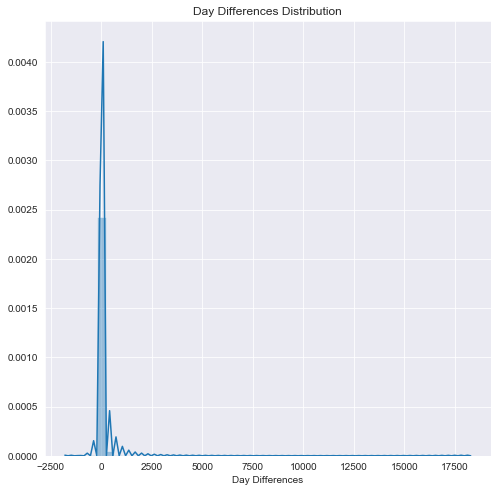

In [156]:
sns.set_style('darkgrid')
plt.figure(figsize = (8,8))
sns.distplot(tsa[~tsa['Day Differences'].isna()]['Day Differences'])
plt.title('Day Differences Distribution')

If we seen it from the plot, it seems there is days that less than 0 and even over than 1000. Lets try to visualize them both

Text(0.5, 1.0, 'Day Differences Distribution less than 0')

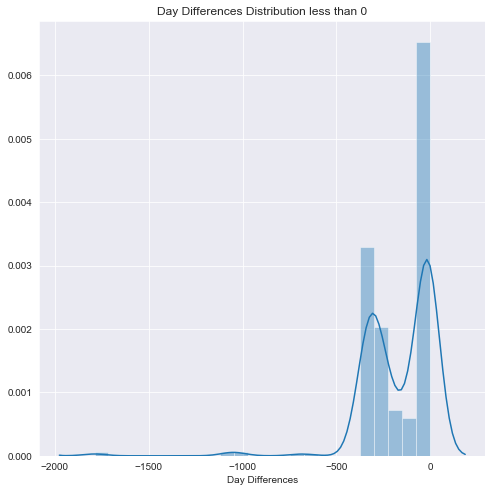

In [157]:
sns.set_style('darkgrid')
plt.figure(figsize = (8,8))
sns.distplot(tsa[tsa['Day Differences'] < 0]['Day Differences'])
plt.title('Day Differences Distribution less than 0')

Text(0.5, 1.0, 'Day Differences Distribution less than 0')

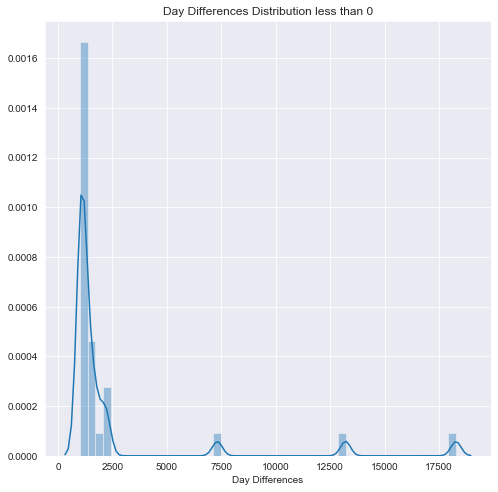

In [158]:
sns.set_style('darkgrid')
plt.figure(figsize = (8,8))
sns.distplot(tsa[tsa['Day Differences'] > 1000]['Day Differences'])
plt.title('Day Differences Distribution less than 0')

### Question
Why do you think there is day that way more than thousand days differences, and why some day differences are less than 0? (claim was made before the incident is like someone predicting a future after all).

In [159]:
tsa

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences
0,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full,-333.0
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN,4.0
2,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny,42.0
3,16759,2002-08-21,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,$21.44,Approved,$21.00,Approve in Full,40.0
4,17846,2002-09-09,2002-08-30,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$1;832.22,Canceled,$0.00,NaN,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51061,2015110926685,2015-10-22,2015-10-19,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses,NaN,NaN,NaN,NaN,3.0
51062,2015110226479,2015-11-02,2015-11-02,NaN,NaN,NaN,Passenger Property Loss,Checkpoint,Books; Magazines & Other,NaN,NaN,NaN,NaN,0.0
51063,2015120727336,2015-11-16,2015-09-14,NaN,NaN,American Airlines,Passenger Property Loss,Checked Baggage,Cosmetics & Grooming,NaN,NaN,NaN,NaN,63.0
51064,2015120427297,2015-11-20,2015-10-16,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,NaN,NaN,NaN,NaN,35.0


In [181]:
tsa_dropna =tsa.dropna()
tsa_data = tsa_dropna[tsa_dropna['Day Differences'] > 1000]

In [182]:
tsa_data.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences
10932,2004100464331,2004-09-09,2001-09-01,ORD,Chicago O'Hare International Airport,American Airlines,Passenger Property Loss,Checkpoint,Clothing - Shoes; belts; accessories; etc.,$30.00,Approved,$30.00,Approve in Full,1104.0
16208,2005061086208,2005-06-01,2002-04-30,FLL,Ft. Lauderdale-Hollywood International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Other,$487.00,Settled,$243.50,Settle,1128.0
20981,2006042505316,2006-04-13,2003-07-16,SEA,Seattle-Tacoma International,Delta Air Lines,Passenger Property Loss,Checkpoint,Jewelry - Fine,$5;015.00,Denied,$0.00,Deny,1002.0
21876,2006062608536,2006-06-23,2003-06-07,COS,Colorado Springs Municipal,American Airlines,Property Damage,Checked Baggage,Luggage (all types including footlockers),$25.00,Denied,$0.00,Deny,1112.0
23508,2006111415554,2006-11-02,2000-10-23,JFK,John F. Kennedy International,Delta Air Lines,Property Damage,Checked Baggage,Luggage (all types including footlockers),$12.72,Approved,$12.72,Approve in Full,2201.0


In [183]:
tsa_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 10932 to 36017
Data columns (total 14 columns):
Claim Number       16 non-null object
Date Received      16 non-null datetime64[ns]
Incident Date      16 non-null datetime64[ns]
Airport Code       16 non-null object
Airport Name       16 non-null object
Airline Name       16 non-null object
Claim Type         16 non-null object
Claim Site         16 non-null object
Item               16 non-null object
Claim Amount       16 non-null object
Status             16 non-null object
Close Amount       16 non-null object
Disposition        16 non-null object
Day Differences    16 non-null float64
dtypes: datetime64[ns](2), float64(1), object(11)
memory usage: 1.9+ KB


In [189]:
pd.DataFrame(tsa_data['Item'].value_counts().head())

,Item
Other,3
Luggage (all types including footlockers),2
Clothing - Shoes; belts; accessories; etc.,2
Currency,2
Jewelry - Fine,1


In [186]:
pd.DataFrame(tsa_data['Claim Type'].value_counts())

,Claim Type
Passenger Property Loss,9
Property Damage,5
Personal Injury,1
Passenger Theft,1


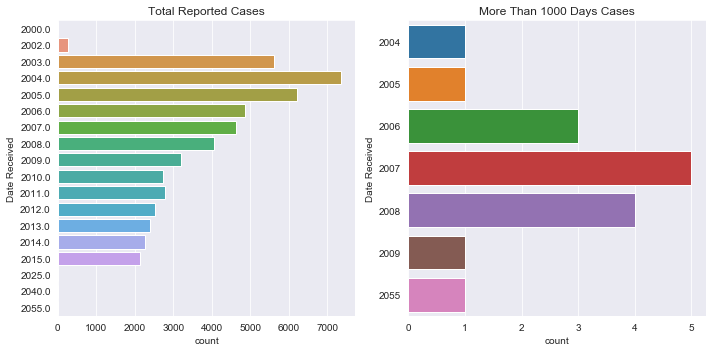

In [188]:
fig, ax= plt.subplots(1,2,figsize=(10,5))
sns.countplot(y = tsa['Date Received'].dt.year, ax=ax[0])
sns.countplot(y = tsa_data['Date Received'].dt.year, ax=ax[1])
ax[0].set_title('Total Reported Cases')
ax[1].set_title('More Than 1000 Days Cases')
plt.tight_layout()

Dari data diatas dapat kita lihat bahwa 'Claim Type' tertinggi itu adalah: Passenger Property Loss dan Property Damage.
Dimana kedua 'Claim Type' tersebut bisa kita asumsikan merupakan 'item' yang berupa Luggage (all types including footlockers), Clothing - Shoes; belts; accessories;, dan Others.  

Asumsi yang bisa saya ambil setelah melihat data pada 'Total Reported Cases' dari tahun 2004 samai 2007 saja 'Reported Cases' sangat banyak, pada 2004 saja terhitung lebih dari 7000 'Reported Cases'. Dari banyaknya kasus yang di report asumsi saya ada saja penumpang yang tidak melakukan claim atau mungkin lupa atau melupakannya saja kasusnya begitu saja karena mungkin beberapa item yang di claim karena 'Property Loss' dan 'Property Damage' tidak begitu berharga sehingga penumpang tidak begitu memperdulikannya.

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Remove the $ sign (some data need even more clean up by replacing the ; sign into . sign) from the Claim Amount columns and Close Amount columns, and change those columns datatype into float datatype

In [190]:
tsa["Claim Amount"] = tsa["Claim Amount"].str.replace('$', '')
tsa["Close Amount"] = tsa["Close Amount"].str.replace('$', '')

In [191]:
tsa["Claim Amount"] = tsa["Claim Amount"].str.replace(';', '')
tsa["Close Amount"] = tsa["Close Amount"].str.replace(';', '')

In [192]:
tsa['Claim Amount'] = tsa['Claim Amount'].apply(lambda x: float(x))
tsa['Close Amount'] = tsa['Close Amount'].apply(lambda x: float(x))

Create a new columns called Amount Differences by substract the Claim Amount with Close Amount columns

In [194]:
tsa['Amount Differences'] = tsa['Claim Amount'] - tsa['Close Amount']

In [195]:
tsa_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 10932 to 36017
Data columns (total 14 columns):
Claim Number       16 non-null object
Date Received      16 non-null datetime64[ns]
Incident Date      16 non-null datetime64[ns]
Airport Code       16 non-null object
Airport Name       16 non-null object
Airline Name       16 non-null object
Claim Type         16 non-null object
Claim Site         16 non-null object
Item               16 non-null object
Claim Amount       16 non-null object
Status             16 non-null object
Close Amount       16 non-null object
Disposition        16 non-null object
Day Differences    16 non-null float64
dtypes: datetime64[ns](2), float64(1), object(11)
memory usage: 2.5+ KB


In [196]:
tsa_data.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences
10932,2004100464331,2004-09-09,2001-09-01,ORD,Chicago O'Hare International Airport,American Airlines,Passenger Property Loss,Checkpoint,Clothing - Shoes; belts; accessories; etc.,$30.00,Approved,$30.00,Approve in Full,1104.0
16208,2005061086208,2005-06-01,2002-04-30,FLL,Ft. Lauderdale-Hollywood International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Other,$487.00,Settled,$243.50,Settle,1128.0
20981,2006042505316,2006-04-13,2003-07-16,SEA,Seattle-Tacoma International,Delta Air Lines,Passenger Property Loss,Checkpoint,Jewelry - Fine,$5;015.00,Denied,$0.00,Deny,1002.0
21876,2006062608536,2006-06-23,2003-06-07,COS,Colorado Springs Municipal,American Airlines,Property Damage,Checked Baggage,Luggage (all types including footlockers),$25.00,Denied,$0.00,Deny,1112.0
23508,2006111415554,2006-11-02,2000-10-23,JFK,John F. Kennedy International,Delta Air Lines,Property Damage,Checked Baggage,Luggage (all types including footlockers),$12.72,Approved,$12.72,Approve in Full,2201.0


Lets try to visualize it again similar to the Day Differences feature, but this time we would use the Amount Differences feature (still just drop the NaN first)

Text(0.5, 1.0, 'Amount Differences Distribution')

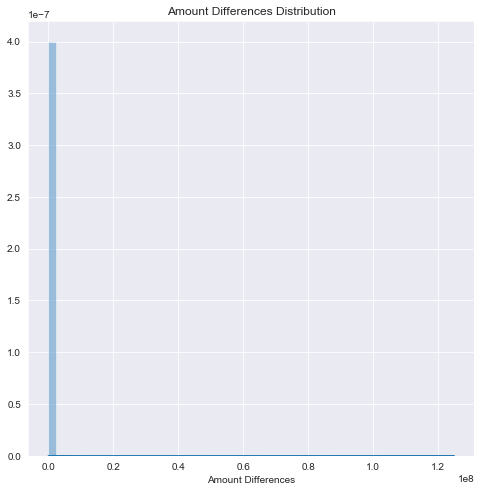

In [198]:
sns.set_style('darkgrid')
plt.figure(figsize = (8,8))
sns.distplot(tsa[(~tsa['Amount Differences'].isna())]['Amount Differences'])
plt.title('Amount Differences Distribution')

There is seems a differences in number that was way far. This time, lets use the Interquartile range (IQR) method to find the datapoint that seems to be an outlier based on the Amount Differences column, show the dataframe, and lets describe the Claim Amount and Close Amount column of the outlier dataframe based on the Amount Differences column

In [200]:
Q1 = tsa['Amount Differences'].describe()['25%']
Q3 = tsa['Amount Differences'].describe()['75%']
IQR = Q3 - Q1
Lower  = Q1 - 1.5*IQR
Upper = Q3 + 1.5*IQR

In [201]:
outlier = tsa[(tsa['Amount Differences'] < Lower) | (tsa['Amount Differences'] > Upper)]

In [202]:
outlier

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
4,17846,2002-09-09,2002-08-30 00:00:00,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.00,NaN,10.0,1832.22
13,19133,2002-10-02,2002-08-22 00:00:00,CLE,Cleveland Hopkins International,Northwest Airlines,NaN,Other,Computer - Laptop,2000.00,Denied,0.00,Deny,41.0,2000.00
21,18614,2002-10-17,2002-09-14 00:00:00,MCO,Orlando International Airport,American Airlines,Property Damage,Checkpoint,Computer - Laptop,2000.00,Settled,600.00,Settle,33.0,1400.00
23,18356,2002-10-23,2002-09-18 00:00:00,LGA,LaGuardia,NaN,NaN,Checkpoint,Computer - Laptop,1801.99,Settled,291.67,Settle,35.0,1510.32
27,21817,2002-10-29,2002-10-05 00:00:00,MCO,Orlando International Airport,Delta Air Lines,NaN,Other,Other,7500.00,Denied,0.00,Deny,24.0,7500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36208,2009123167012,2009-12-29,2009-12-18 00:00:00,MIA,Miami International Airport,American Airlines,Property Damage,Checked Baggage,NaN,2200.00,Denied,0.00,Deny,11.0,2200.00
36210,2009123167017,2009-12-29,2009-12-02 15:30:00,JFK,John F. Kennedy International,KLM Royal Dutch Airlines,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.; Co...,900.00,Denied,0.00,Deny,26.0,900.00
36213,2010010867323,2009-12-29,2009-12-21 15:15:00,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Property Damage,Checkpoint,Computer - Laptop,1240.00,Denied,0.00,Deny,7.0,1240.00
36225,2009123066912,2009-12-30,2009-12-15 00:00:00,GSO,Piedmont Triad International Airport,Delta Air Lines,Property Damage,Checked Baggage,NaN,2300.00,Denied,0.00,Deny,15.0,2300.00


In [203]:
outlier['Claim Amount'].describe()

count    4.103000e+03
mean     4.164579e+04
std      1.954354e+06
min      8.510100e+02
25%      1.214375e+03
50%      1.821750e+03
75%      3.000000e+03
max      1.250000e+08
Name: Claim Amount, dtype: float64

In [204]:
outlier['Close Amount'].describe()

count     4103.000000
mean       114.613646
std        686.521806
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      20000.000000
Name: Close Amount, dtype: float64

It seems that Claim Amount feature really affecting lot of the differences that happen as 75% outlier data that in the Close Amount feature is still 0.

### Question
I assume that many of this big differences happen because these people tend to request for bigger money than what it should be. Do you agree or disagree with my assumption (With an assumption that not outlier is have normal amount differences and outlier have a really big amount differences)? why? Try to explain it with the data

=========

Tahap pertama kita perlu mengambil data non outlier

In [210]:
nonOutlier = tsa[~tsa['Amount Differences'].isin(outlier)]

In [211]:
nonOutlier.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
0,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.0,Approve in Full,-333.0,0.00
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,2270.09,Canceled,NaN,NaN,4.0,NaN
2,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),200.00,Denied,0.0,Deny,42.0,200.00
3,16759,2002-08-21,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,21.44,Approved,21.0,Approve in Full,40.0,0.44
4,17846,2002-09-09,2002-08-30,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.0,NaN,10.0,1832.22


In [212]:
from scipy.stats import anderson
def try_normal(data):
    result = {'Anderson' : {i:j for i,j in zip(anderson(data)[2], anderson(data)[1])}}
    result['Anderson']['stat'] = anderson(data)[0]
    return result

Kita perlu melihat normalitas data, untuk kemudian kita dapat melihat korelasinya dengan menggunakan metode 'pearson' atau 'spearman'

In [213]:
try_normal(nonOutlier['Claim Amount'].dropna())

{'Anderson': {15.0: 0.576,
  10.0: 0.656,
  5.0: 0.787,
  2.5: 0.918,
  1.0: 1.092,
  'stat': 18008.13274811356}}

== Distribusi Data tidak mengikuti Normal Distribution

In [216]:
try_normal(nonOutlier['Close Amount'].dropna())

{'Anderson': {15.0: 0.576,
  10.0: 0.656,
  5.0: 0.787,
  2.5: 0.918,
  1.0: 1.092,
  'stat': 10940.695195483575}}

== Distribusi Data tidak mengikuti Normal Distribution

In [217]:
try_normal(nonOutlier['Amount Differences'].dropna())

{'Anderson': {15.0: 0.576,
  10.0: 0.656,
  5.0: 0.787,
  2.5: 0.918,
  1.0: 1.092,
  'stat': 12861.006688797337}}

== Distribusi Data tidak mengikuti Normal Distribution

In [218]:
try_normal(outlier['Claim Amount'])

{'Anderson': {15.0: 0.575,
  10.0: 0.655,
  5.0: 0.786,
  2.5: 0.917,
  1.0: 1.091,
  'stat': 1559.8322253694841}}

== Distribusi Data tidak mengikuti Normal Distribution

In [219]:
try_normal(outlier['Close Amount'])

{'Anderson': {15.0: 0.575,
  10.0: 0.655,
  5.0: 0.786,
  2.5: 0.917,
  1.0: 1.091,
  'stat': 1244.9229604344491}}

== Distribusi Data tidak mengikuti Normal Distribution

In [220]:
try_normal(outlier['Amount Differences'])

{'Anderson': {15.0: 0.575,
  10.0: 0.655,
  5.0: 0.786,
  2.5: 0.917,
  1.0: 1.091,
  'stat': 1559.9949476747934}}

== Distribusi Data tidak mengikuti Normal Distribution

In [221]:
nonOutlier[['Claim Amount', 'Amount Differences']].corr('spearman')

,Claim Amount,Amount Differences
Claim Amount,1.000000,0.787883
Amount Differences,0.787883,1.000000


In [222]:
outlier[['Claim Amount', 'Amount Differences']].corr('spearman')

,Claim Amount,Amount Differences
Claim Amount,1.000000,0.958133
Amount Differences,0.958133,1.000000


In [227]:
outlierDiff = outlier['Claim Amount'].median() - outlier['Close Amount'].median()
nonOutlierDiff = nonOutlier['Claim Amount'].median() - nonOutlier['Close Amount'].median()

print(f'outlier difference : {outlierDiff}''\n'
      f'Non Outlier difference : {nonOutlierDiff}')

outlier difference : 1821.75
Non Outlier difference : 113.50999999999999


Untuk melihat korelasi datanya saya menggunakan 'spearman' melihat dari datanya tidak mengikuti Normal Distribution. Bisa kita lihat masing-masing data yang kita uji korelasinya bisa dibilang sangat erat hubungannya.
Dapat Saya asumsikan bahwa semakin besar'Claim Amount' makan 'Amount Differences' nya juga membesar, begitu juga sebaliknya.

Dan dari data diatas saya setuju kalau 'not outlier' memiliki 'amount differences' yang normal dan 'outlier' memiliki 'amount differences' yang sangan besar.

=================================

### Analysis
We have try to cleaning some of the data that we have, and now we could try to done few analysis from the data we had. Try to answer this following question.

### Question
1. Is there Any relationship between the Airport and/or the Airline with the number of the claim that happen and the Claim Type? Also why is there a NaN in the Claim Type column?
2. If you realize, there is many different classes in the Status and Disposition column. What pattern you could find in these 2 columns because of this classes variation? is there any relation with the other columns?

In [229]:
tsa.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
0,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.0,Approve in Full,-333.0,0.00
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,2270.09,Canceled,NaN,NaN,4.0,NaN
2,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),200.00,Denied,0.0,Deny,42.0,200.00
3,16759,2002-08-21,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,21.44,Approved,21.0,Approve in Full,40.0,0.44
4,17846,2002-09-09,2002-08-30,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.0,NaN,10.0,1832.22


In [233]:
pd.DataFrame(tsa['Airport Name'].value_counts().head())

,Airport Name
John F. Kennedy International,2286
Los Angeles International Airport,1813
Newark International Airport,1747
Chicago O'Hare International Airport,1712
Orlando International Airport,1633


In [234]:
pd.DataFrame(tsa['Airline Name'].value_counts().head())

,Airline Name
American Airlines,4377
Delta Air Lines,4371
UAL,3507
Southwest Airlines,3258
Continental Airlines,2363


In [237]:
pd.DataFrame(tsa['Claim Type'].value_counts())

,Claim Type
Passenger Property Loss,29713
Property Damage,18590
Personal Injury,394
Passenger Theft,115
Employee Loss (MPCECA),114
Motor Vehicle,96
Complaint,13


In [238]:
pd.DataFrame(tsa.groupby('Airline Name')['Claim Type'].value_counts().sort_values(ascending = False).head())

,,Claim Type
Airline Name,Claim Type,
Delta Air Lines,Passenger Property Loss,2665
American Airlines,Passenger Property Loss,2646
UAL,Passenger Property Loss,2072
Southwest Airlines,Passenger Property Loss,1955
Continental Airlines,Passenger Property Loss,1539


In [235]:
pd.DataFrame(tsa.groupby('Airport Name')['Claim Type'].value_counts().sort_values(ascending = False).head())

,,Claim Type
Airport Name,Claim Type,
John F. Kennedy International,Passenger Property Loss,1607
Newark International Airport,Passenger Property Loss,1111
Los Angeles International Airport,Passenger Property Loss,1090
Orlando International Airport,Passenger Property Loss,1056
Miami International Airport,Passenger Property Loss,997


In [240]:
def cramers(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [241]:
cramers(tsa['Airline Name'], tsa['Claim Type'])

0.04264088575901359

In [242]:
cramers(tsa['Airport Name'], tsa['Claim Type'])

0.2522217766994018

====

cek korelasinya

In [243]:
tsa[['Airline Name','Claim Type']].apply(lambda x: x.factorize()[0]).corr('spearman')

,Airline Name,Claim Type
Airline Name,1.00000,0.11976
Claim Type,0.11976,1.00000


In [244]:
tsa[['Airport Name','Claim Type']].apply(lambda x: x.factorize()[0]).corr('spearman')

,Airport Name,Claim Type
Airport Name,1.000000,0.042477
Claim Type,0.042477,1.000000


Dari data diatas dapat kita lihat bahwa antara 'Airport and/or the Airline' dengan jumlah 'claim' and 'Claim Type' hubungannya tidak erat, untuk NaN value pada kolom 'Claim type' saya berasumsi kalau penumpan tidak mengisinya atau mengosongkannya saat pengisian data claim.

## Bonus Question

Could you find any interesting Insight from our data that you could explain? Try to explain it with the available data

In [245]:
tsa.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
0,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.0,Approve in Full,-333.0,0.00
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,2270.09,Canceled,NaN,NaN,4.0,NaN
2,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),200.00,Denied,0.0,Deny,42.0,200.00
3,16759,2002-08-21,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,21.44,Approved,21.0,Approve in Full,40.0,0.44
4,17846,2002-09-09,2002-08-30,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.0,NaN,10.0,1832.22
